<a href="https://colab.research.google.com/github/Abroh2005/colabnotebook/blob/main/neural_network_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
import tensorflow_hub as hub

In [48]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


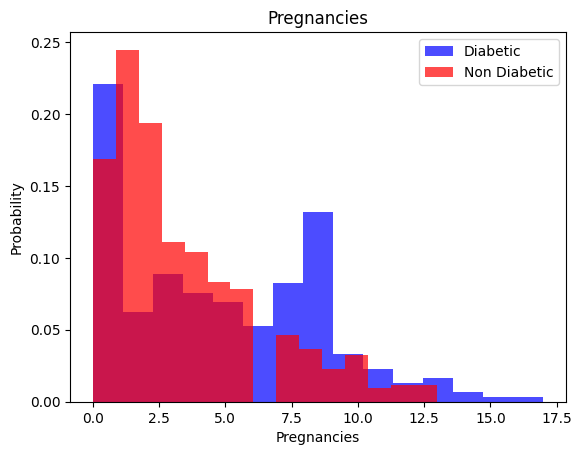

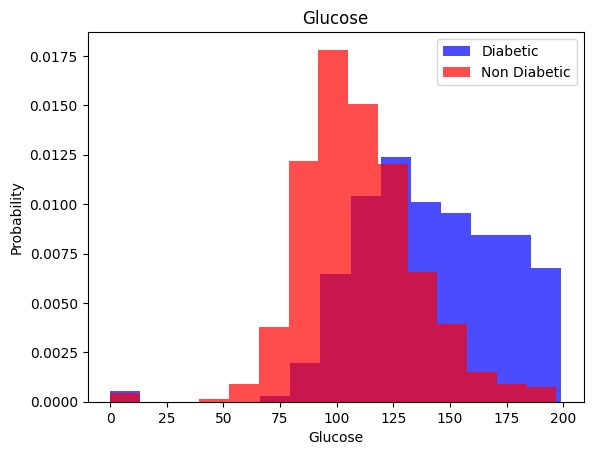

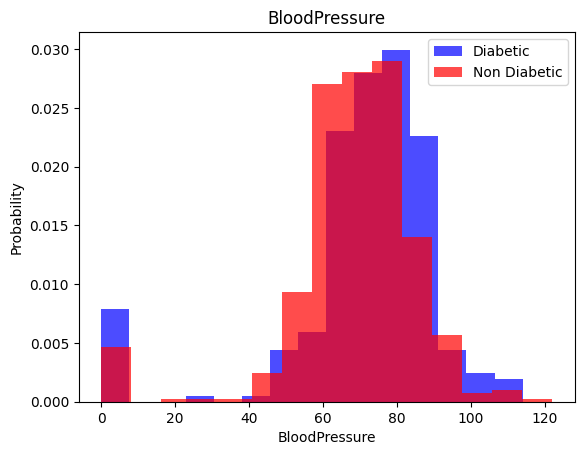

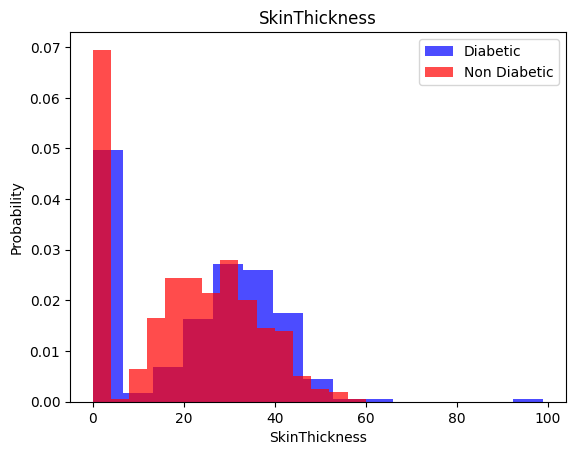

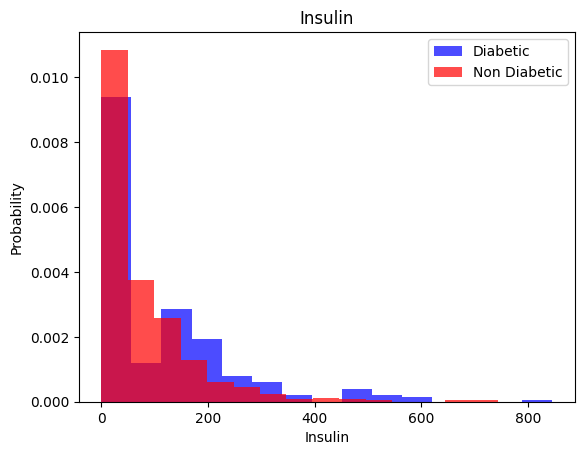

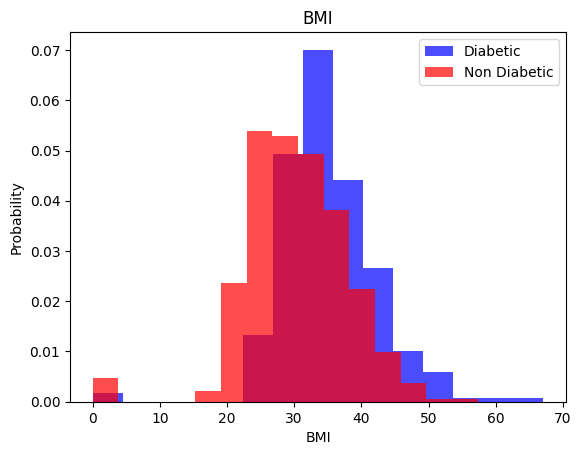

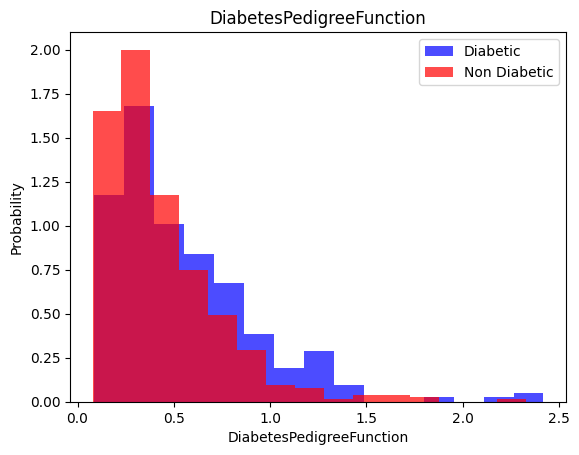

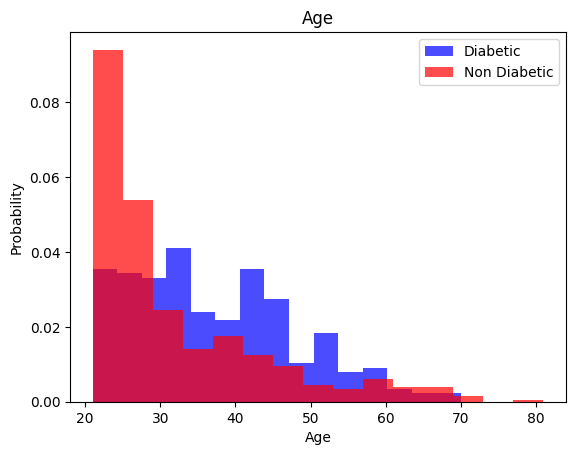

In [49]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df["Outcome"]==1][label],color='blue',label='Diabetic',alpha=0.7,density=True,bins=15)
  plt.hist(df[df["Outcome"]==0][label],color='red',label="Non Diabetic",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [50]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [51]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
transform_df=pd.DataFrame(data,columns=df.columns)

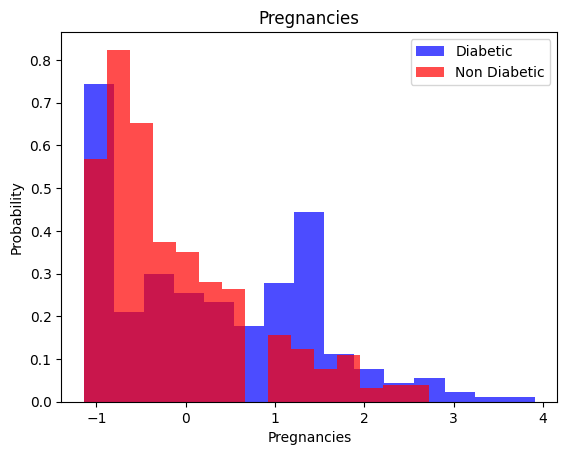

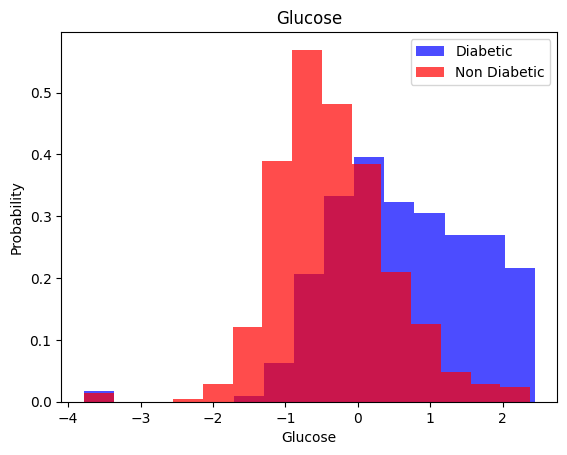

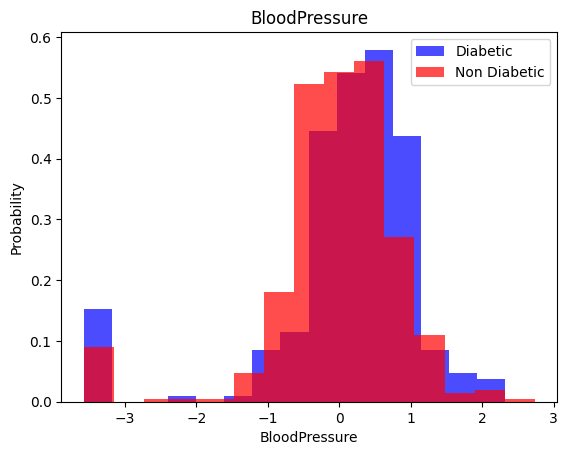

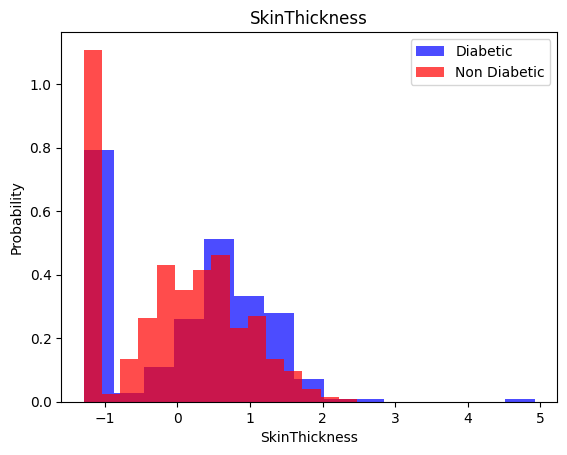

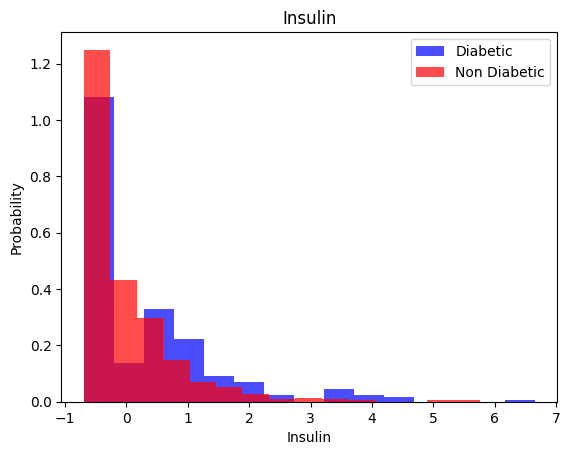

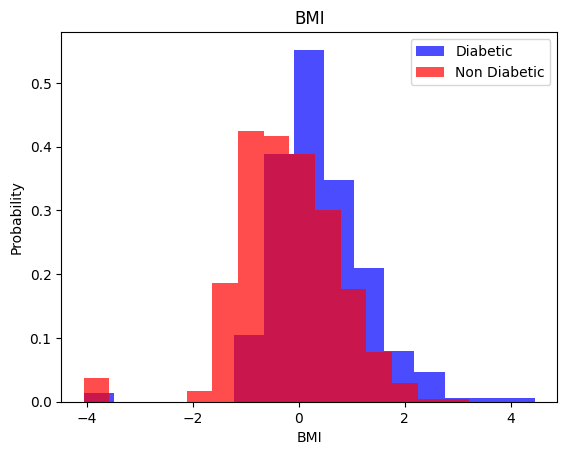

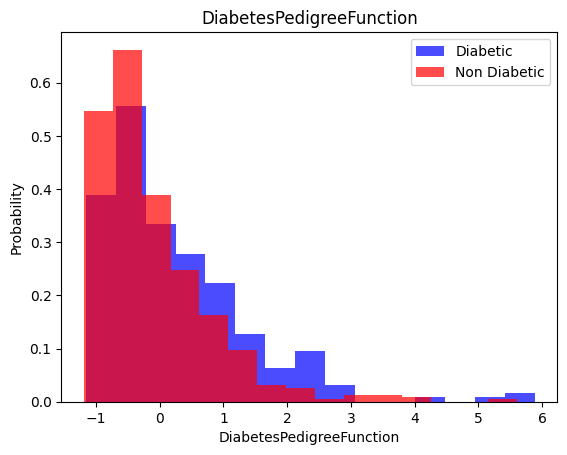

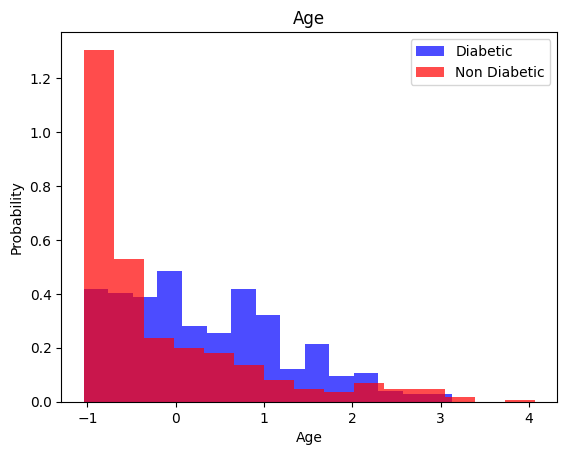

In [52]:
for i in range(len(transform_df.columns[:-1])):
  label=transform_df.columns[i]
  plt.hist(transform_df[transform_df["Outcome"]==1][label],color='blue',label='Diabetic',alpha=0.7,density=True,bins=15)
  plt.hist(transform_df[transform_df["Outcome"]==0][label],color='red',label="Non Diabetic",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [53]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transform_df=pd.DataFrame(data,columns=df.columns)

In [54]:
len(transform_df[transform_df["Outcome"]==1]),len(transform_df[transform_df["Outcome"]==0])

(500, 500)

In [55]:
xtrain,xtemp,ytrain,ytemp=train_test_split(x,y,test_size=0.4, random_state=0)
xvalid,xtest,yvalid,ytest=train_test_split(xtemp,ytemp,test_size=0.4, random_state=0)

In [56]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),#ifx<0-->0,x>0-->x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['Accuracy'])

In [58]:
model.evaluate(xtrain,ytrain)

19/19 [==============================] - 0s 2ms/step - loss: 0.7255 - Accuracy: 0.5000


[0.7254623770713806, 0.5]

In [59]:
model.evaluate(xvalid,yvalid)

8/8 [==============================] - 0s 2ms/step - loss: 0.7064 - Accuracy: 0.5125


[0.7063775658607483, 0.512499988079071]

In [60]:
model.fit(xtrain,ytrain,batch_size=16,epochs=20,validation_data=(xvalid,yvalid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6945 - Accuracy: 0.5767 - val_loss: 0.6520 - val_Accuracy: 0.6542
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6391 - Accuracy: 0.6900 - val_loss: 0.6143 - val_Accuracy: 0.7250
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5981 - Accuracy: 0.7200 - val_loss: 0.5786 - val_Accuracy: 0.7625
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5657 - Accuracy: 0.7383 - val_loss: 0.5519 - val_Accuracy: 0.7625
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5451 - Accuracy: 0.7483 - val_loss: 0.5305 - val_Accuracy: 0.7708
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5291 - Accuracy: 0.7517 - val_loss: 0.5186 - val_Accuracy: 0.7792
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5167 - Accuracy: 0.7433 - val_loss: 0.5069 - val_Accuracy: 0.7708
Epoch 8/20
38/38 [==

In [61]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 6ms/step - loss: 0.4866 - Accuracy: 0.8000


[0.4866155982017517, 0.800000011920929]